# Data Science Nigeria X Microsoft 2024 AI Bootcamp Qualification Hackathon

## Heart Disease Prediction

by Tenifayo Fagbemi

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("Train Dataset .csv")

In [3]:
test_df = pd.read_csv("Test Dataset.csv")

In [4]:
train_df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [6]:
train_df.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
train_df.drop(['Id'],axis=1, inplace=True)

In [8]:
train_df['target'].value_counts(normalize=True)

1    0.813501
0    0.186499
Name: target, dtype: float64

#### This dataset has 7303 entries with 13 independent variables. 81.35% of these entries belong to target class `1` while the remaining 18.65% belong to target class `0`. This indicates that this is an imbalanced dataset. 

### Exploratory Data Analysis

In [10]:
#Changing the data type of categorical variables
categorical_var = ['Sex','cp','fbs','restecg','exang','slope','thal', 'ca']

for col in categorical_var:
    train_df[col] = train_df[col].astype('category')

In [11]:
#Binning the ages into age groups: early adulthood (18-40), late adulthood (41-65), geriatric population (66 - 90)
custom_bin_edges = [18, 40, 65, 90]

custom_bin_labels = ['18-40', '41-65', '66-90']

train_df['age_group'] = pd.cut(train_df['Age'], bins=custom_bin_edges, labels=custom_bin_labels, include_lowest=True)

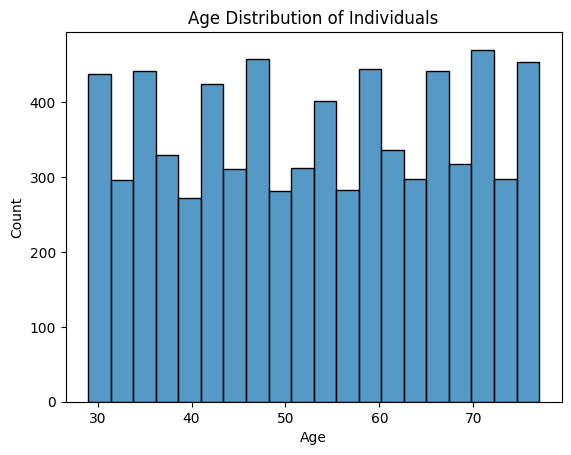

In [12]:
#Age 
sns.histplot(data=train_df, x='Age')
plt.title('Age Distribution of Individuals')
plt.show()

In [13]:
train_df['age_group'].value_counts(normalize=True)

41-65    0.507463
66-90    0.249213
18-40    0.243325
Name: age_group, dtype: float64

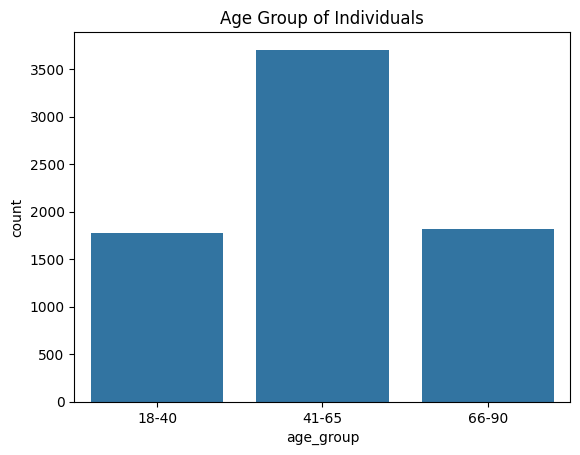

In [14]:
sns.countplot(data=train_df, x='age_group')
plt.title('Age Group of Individuals')
plt.show()

About 50.7% of the patients are within the age range of 41 to 65 years.

In [15]:
train_df['Sex'].value_counts()

0    3654
1    3649
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Gender Distribution of Individuals')

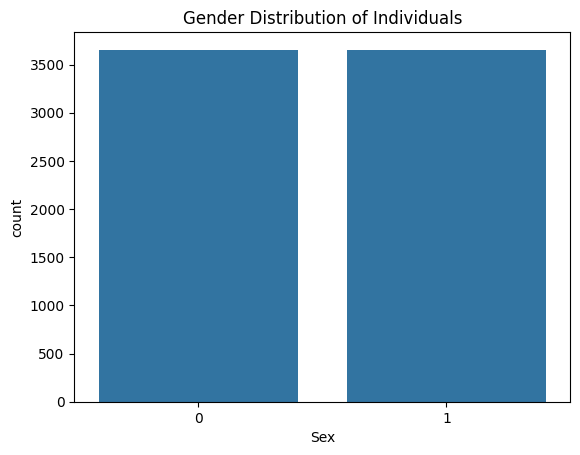

In [16]:
sns.countplot(data=train_df, x='Sex')
plt.title('Gender Distribution of Individuals')

<Axes: xlabel='Sex', ylabel='count'>

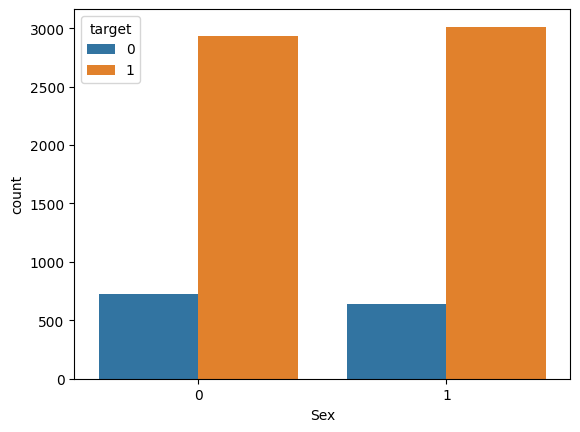

In [17]:
sns.countplot(data=train_df, x='Sex',hue='target')

The dataset contains an equal distribution of both male and female gender. 

In [18]:
#chest pain type (4 values)
train_df['cp'].value_counts()

1    1858
3    1829
2    1814
0    1802
Name: cp, dtype: int64

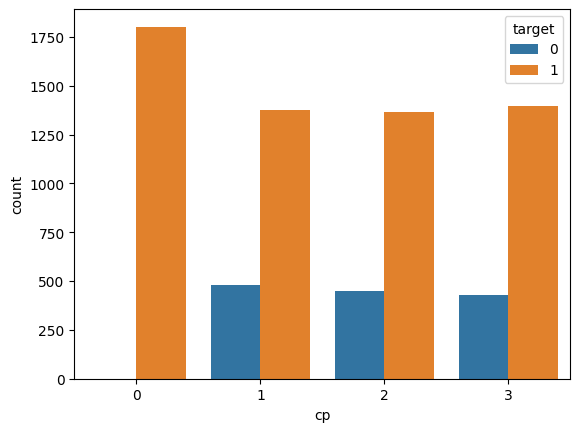

In [19]:
sns.countplot(data=train_df, x='cp',hue='target')
plt.show()

The chart above shows that individuals with type 0 chest pain are much more likely to have heart disease. 

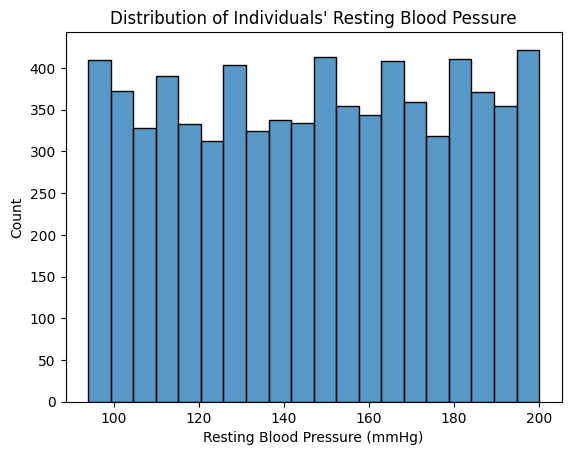

In [20]:
#resting blood pressure
sns.histplot(data=train_df, x='trestbps')
plt.title('Distribution of Individuals\' Resting Blood Pessure')
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.show()

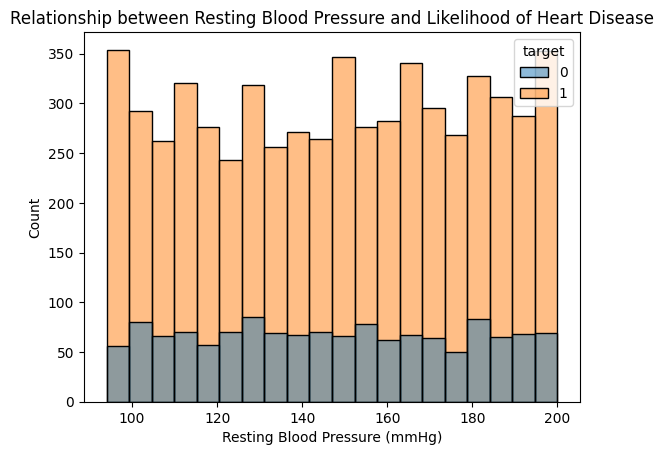

In [21]:
sns.histplot(x='trestbps', data=train_df, hue='target')
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.title('Relationship between Resting Blood Pressure and Likelihood of Heart Disease')
plt.show()

Text(0.5, 1.0, 'Relationship between Serum Cholesterol and Likelihood of Heart Disease')

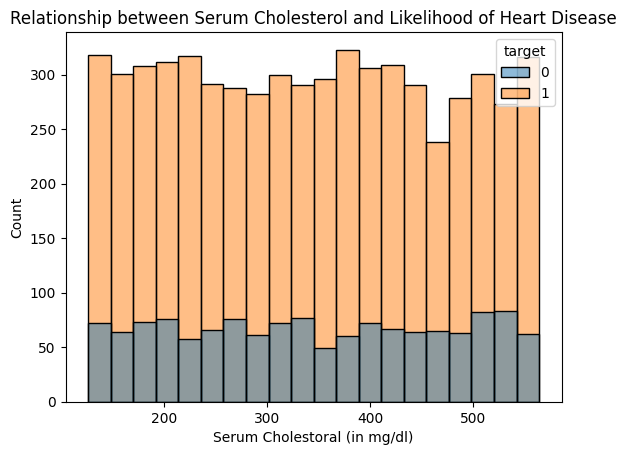

In [22]:
#serum cholesterol in mg/dl
sns.histplot(x='chol', data=train_df, hue='target')
plt.xlabel('Serum Cholestoral (in mg/dl)')
plt.title('Relationship between Serum Cholesterol and Likelihood of Heart Disease')


In [23]:
#fasting blood sugar > 120 mg/dl
train_df['fbs'].value_counts()

0    3702
1    3601
Name: fbs, dtype: int64

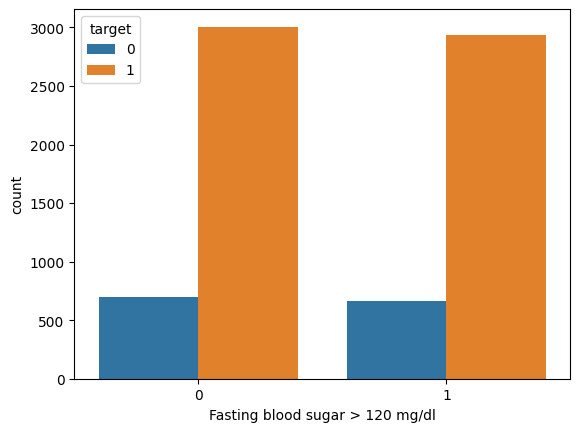

In [24]:
sns.countplot(data=train_df, x='fbs',hue='target')
plt.xlabel('Fasting blood sugar > 120 mg/dl')
plt.show()

In [25]:
#resting electrocardiographic results (values 0,1,2)
train_df['restecg'].value_counts()


2    2478
1    2442
0    2383
Name: restecg, dtype: int64

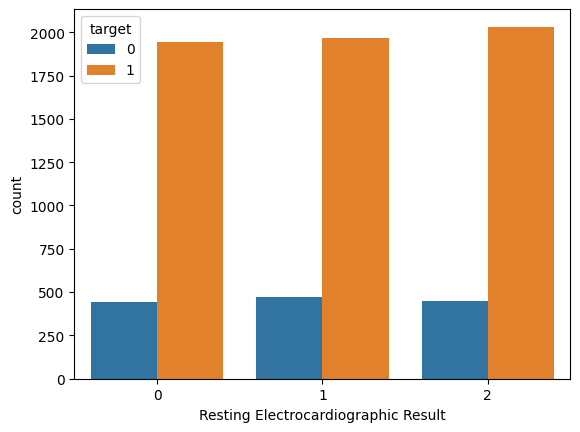

In [26]:
sns.countplot(data=train_df, x='restecg',hue='target')
plt.xlabel('Resting Electrocardiographic Result')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


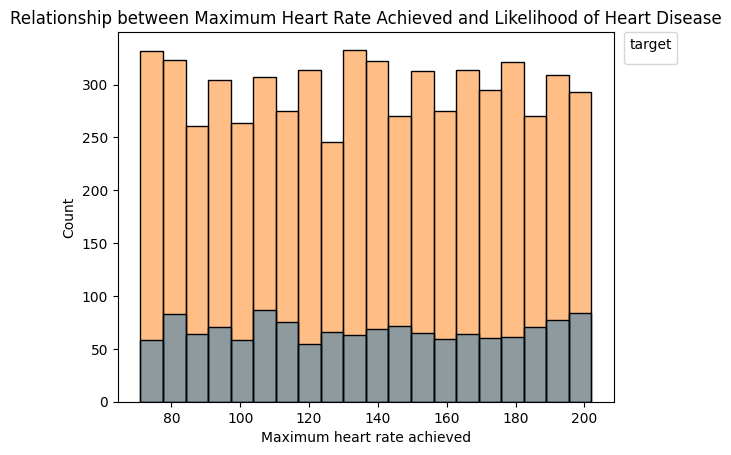

In [27]:
#maximum heart rate achieved
sns.histplot(x='thalach', data=train_df, hue='target')
plt.xlabel('Maximum heart rate achieved')
plt.title('Relationship between Maximum Heart Rate Achieved and Likelihood of Heart Disease')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='target')
plt.show()

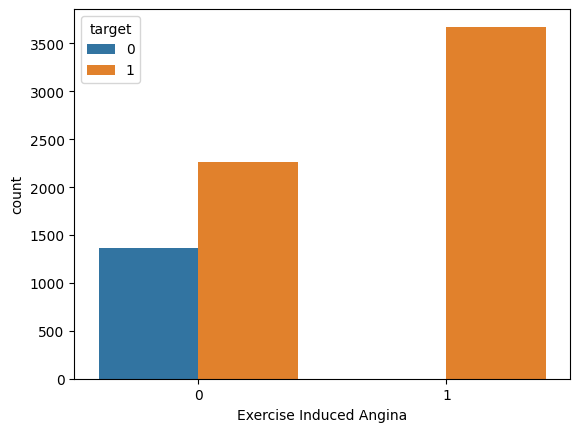

In [28]:
#exercise induced angina
sns.countplot(data=train_df, x='exang',hue='target')
plt.xlabel('Exercise Induced Angina')
plt.show()

The chart above shows that individuals with exercise induced angina are much more likely to have heart disease. 

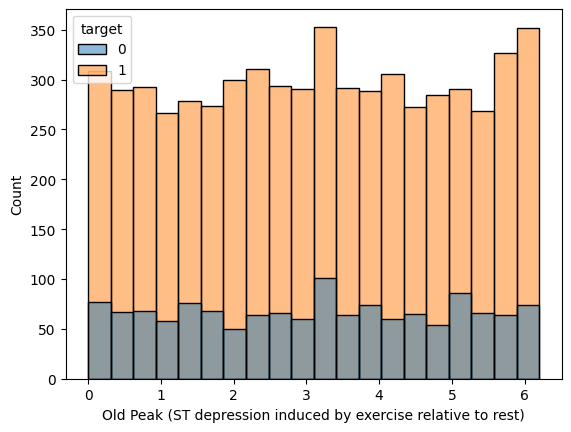

In [29]:
#oldpeak = ST depression induced by exercise relative to rest
sns.histplot(x='oldpeak', data=train_df, hue='target')
plt.xlabel('Old Peak (ST depression induced by exercise relative to rest)')
plt.show()

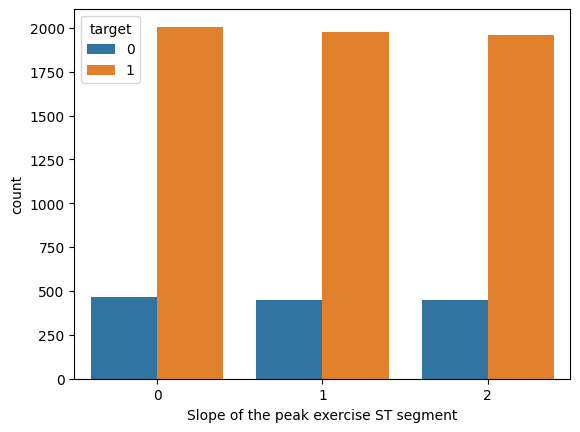

In [30]:
#the slope of the peak exercise ST segment
sns.countplot(data=train_df, x='slope',hue='target')
plt.xlabel('Slope of the peak exercise ST segment')
plt.show()

In [31]:
#number of major vessels (0-3) colored by flourosopy
train_df['ca'].value_counts()

2    1505
4    1488
3    1448
1    1439
0    1423
Name: ca, dtype: int64

Text(0.5, 1.0, 'Relationship between Number of major vessels coloured by flourosopy and Likelihood of Heart Disease')

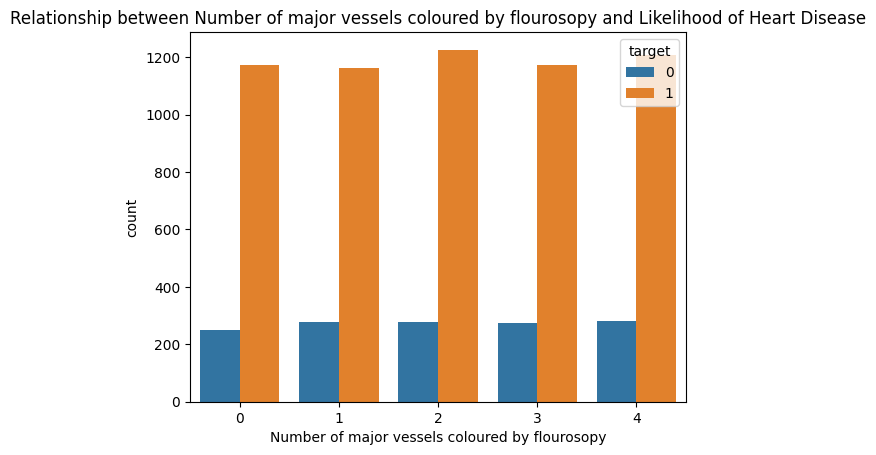

In [32]:
sns.countplot(data=train_df, x='ca',hue='target')
plt.xlabel('Number of major vessels coloured by flourosopy')
plt.title('Relationship between Number of major vessels coloured by flourosopy and Likelihood of Heart Disease')

In [33]:
#thal: 0 = normal; 1 = fixed defect; 2 = reversable defect  ????
#Thalassemia is an inherited blood disorder that results in abnormal hemoglobin (wikipedia)
train_df['thal'].value_counts()

1    1879
3    1822
2    1813
0    1789
Name: thal, dtype: int64

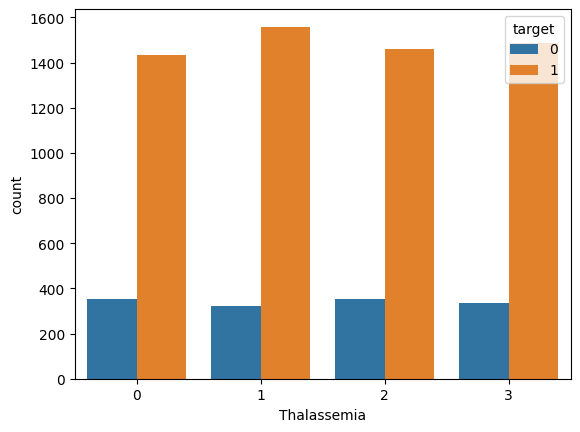

In [34]:
sns.countplot(data=train_df, x='thal',hue='target')
plt.xlabel('Thalassemia')
plt.show()

C:\Users\BAB AL SAFA\AppData\Local\Temp\ipykernel_16568\432978268.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = train_df.corr()


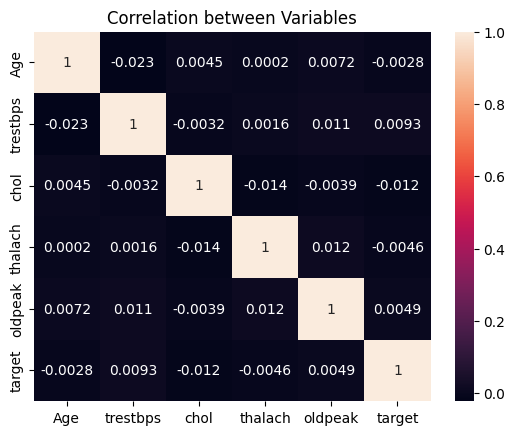

In [35]:
df_corr = train_df.corr()
sns.heatmap(df_corr, annot=True)
plt.title('Correlation between Variables')
plt.show()

The heatmap shows that there is no significant correlation between any of the variables.

#### Modelling

In [36]:
#ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [37]:
X = train_df.drop(['target','Age'], axis=1)
y = train_df['target']

In [38]:
X = pd.get_dummies(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=2)

To create a more balanced version of the dataset, oversampling technique was used 

In [40]:
resampler = SMOTE(sampling_strategy=1, random_state=1)
X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

In [41]:
xgb = XGBClassifier(n_estimators=150)
xgb.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [42]:
y_pred = xgb.predict(X_test)

In [43]:
model_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
print(f"The accuracy of the model is {model_accuracy}%")

The accuracy of the model is 82.75%


In [44]:
confusion_matrix(y_test,y_pred)

array([[ 145,  127],
       [ 125, 1064]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.53      0.54       272
           1       0.89      0.89      0.89      1189

    accuracy                           0.83      1461
   macro avg       0.72      0.71      0.71      1461
weighted avg       0.83      0.83      0.83      1461



### Prediction on test set

In [46]:
test_df.shape

(2697, 14)

In [47]:
submission = pd.DataFrame()
submission['Id'] = test_df['id']

In [48]:
#Preprocessing
test_df['age_group'] = pd.cut(test_df['age'], bins=custom_bin_edges, labels=custom_bin_labels, include_lowest=True)


In [49]:
test_df.drop(['id','age'], axis=1, inplace=True)

In [50]:
test_df.rename(columns={'sex':'Sex'}, inplace=True)

In [51]:
categorical_var = ['Sex','cp','fbs','restecg','exang','slope','thal','ca', 'age_group']

for col in categorical_var:
    test_df[col] = test_df[col].astype('category')

In [52]:
test_df.head()

,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_group
0,1,0,163,495,0,2,170,1,2.0,1,0,1,66-90
1,1,0,131,238,0,2,74,1,4.9,2,2,2,41-65
2,1,0,95,558,1,1,73,1,0.7,1,1,0,41-65
3,0,1,178,287,0,1,192,1,5.7,1,0,0,18-40
4,0,3,104,281,0,0,122,0,1.3,1,4,3,18-40


In [55]:
test_df = pd.get_dummies(test_df)

In [56]:
submission['target'] = xgb.predict(test_df)

In [57]:
submission.to_csv('submission10.csv', index=False)